In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

tf.test.is_gpu_available()

2.0.0-dev20191002
sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)
matplotlib 3.1.1
numpy 1.17.2
pandas 0.25.1
sklearn 0.21.3
tensorflow 2.0.0-dev20191002
tensorflow_core.keras 2.2.4-tf
Instructions for updating:
Use `tf.config.experimental.list_physical_devices('GPU')` instead.


False

In [2]:
# 在打开网址时出现和ssl证书相关的问题时，需要加上这句话
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
# 采用房屋预测模型数据
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [4]:
from sklearn.model_selection import train_test_split

x_train_all,x_test,y_train_all,y_test = train_test_split(
    housing.data,housing.target,random_state = 7)
x_train,x_valid,y_train,y_valid = train_test_split(
    x_train_all,y_train_all,random_state = 11)
print(x_train.shape,y_train.shape)
print(x_valid.shape,y_valid.shape)
print(x_test.shape,y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [5]:
# 进行数据归一化处理
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.fit_transform(x_valid)
x_test_scaled = scaler.fit_transform(x_test)

In [8]:
# 自定义损失函数:均方根loss
def customized_mse(y_true,y_pred):
    return tf.reduce_mean(tf.square(y_pred - y_true))

model = keras.models.Sequential(
    [keras.layers.Dense(30,activation='relu',input_shape=x_train.shape[1:]),
     keras.layers.Dense(1),
    ])
model.summary()
    
model.compile(loss = customized_mse,
              optimizer = 'sgd',
              metrics=["mean_squared_error"]) # 看一下mean_squared_error和自定义的是否一致

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [9]:
callbacks = [
        keras.callbacks.EarlyStopping(min_delta=1e-2,patience=5)
    ]

# 开始训练:使用归一化的数据
history = model.fit(x_train_scaled,y_train,epochs=10,
        validation_data=(x_valid_scaled,y_valid),
        callbacks=callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 61us/sample - loss: 6.6763 - mean_squared_error: 6.6763 - val_loss: 14.5146 - val_mean_squared_error: 14.5146
Epoch 2/10
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4968 - mean_squared_error: 0.4968 - val_loss: 13.8364 - val_mean_squared_error: 13.8364
Epoch 3/10
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4398 - mean_squared_error: 0.4398 - val_loss: 11.5143 - val_mean_squared_error: 11.5143
Epoch 4/10
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4112 - mean_squared_error: 0.4112 - val_loss: 11.4331 - val_mean_squared_error: 11.4332
Epoch 5/10
11610/11610 [==============================] - 0s 29us/sample - loss: 0.4006 - mean_squared_error: 0.4006 - val_loss: 11.4983 - val_mean_squared_error: 11.4983
Epoch 6/10
11610/11610 [==============================] - 0s 29us/sample - loss: 0.3927 - mean_s

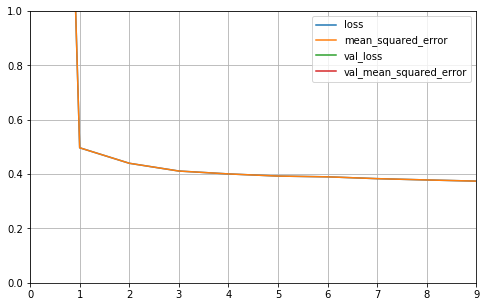

In [11]:
# 把值的变化过程打印出来
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

plot_learning_curves(history)
   

In [12]:
model.evaluate(x_test_scaled,y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.43637623934782754, 0.43637624]